First format Data

In [0]:
second_format_data_to_download = [
'http://ufldl.stanford.edu/housenumbers/train_32x32.mat',
'http://ufldl.stanford.edu/housenumbers/test_32x32.mat',
'http://ufldl.stanford.edu/housenumbers/extra_32x32.mat',
]

In [2]:
for file in second_format_data_to_download:
  !wget $file

--2020-03-29 23:50:19--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat.4’

train_32x32.mat.4   100%[===================>] 173.61M  55.0MB/s    in 3.3s    

2020-03-29 23:50:23 (51.9 MB/s) - ‘train_32x32.mat.4’ saved [182040794/182040794]

--2020-03-29 23:50:24--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat.4’

test_32x32.mat.4    100%[===================>]  61.30M  37.8MB/s    in 1.6s    

2020-03-29 23:50:25 (37.8 MB/s) - ‘test_32x32.mat.4’ saved [642

In [0]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from scipy import io
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Input, BatchNormalization

In [0]:
(mnist_x_train, mnist_y_train), (mnist_x_test, mnist_y_test) = mnist.load_data()

In [0]:
mnist_y_train = to_categorical(mnist_y_train)
mnist_y_test = to_categorical(mnist_y_test)

In [0]:
def mnist_to_rgb_32(data):
    rgb_data = np.repeat(data.reshape(-1, 28, 28, 1), 3, 3)
    padded_data = np.pad(rgb_data, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    return padded_data

In [22]:
mnist_x_train = mnist_to_rgb_32(mnist_x_train) / 255
mnist_x_test = mnist_to_rgb_32(mnist_x_test) / 255

mnist_x_train.shape, mnist_x_test.shape

((60000, 32, 32, 3), (10000, 32, 32, 3))

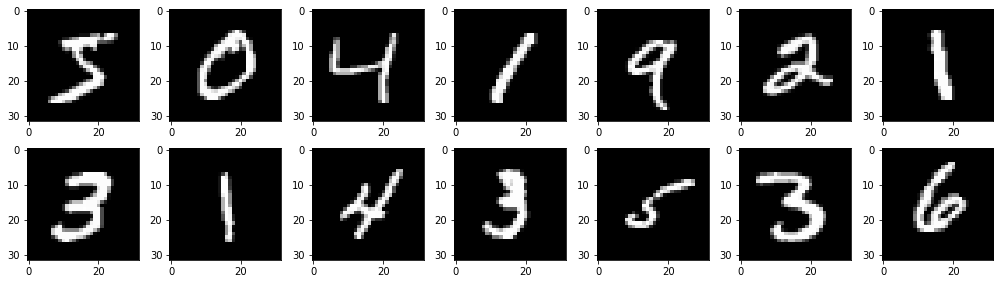

In [8]:
plt.figure(figsize=(14, 4))
for i in range(0, 14):
    plt.subplot(2, 7, i+1)
    image = mnist_x_train[i]
    plt.imshow(image, cmap='gray')
    
plt.tight_layout()
plt.show()

In [0]:
def plot_curves(title, data, y_title, x_title='Epoch', legend=[], x_labels_offset = 0):
    fig = plt.figure(figsize=(8, 4))
        
    for row in data:
        x = range(x_labels_offset, len(row))
        plt.plot(x, row[x_labels_offset:])
    
    plt.title(title)
    plt.ylabel(y_title)
    plt.xlabel(x_title)
    plt.grid(True)
    plt.legend(legend, loc='upper left')
    plt.show()

In [0]:
def get_model():
    m_input = Input(shape=(32, 32, 3))
        
    l = Conv2D(32, (4, 4), activation='relu', padding='same', strides=1)(m_input)
    l = BatchNormalization()(l)
    l = MaxPooling2D(pool_size=(2, 2))(l) 
    #l = Dropout(0.1)(l)

    l = Conv2D(64, (4, 4), activation='relu', padding='same', strides=1)(l)
    l = BatchNormalization()(l)
    l = MaxPooling2D(pool_size=(2, 2))(l) 
    l = Dropout(0.25)(l)
    
    l = Conv2D(128, (4, 4), activation='relu', padding='same', strides=1)(l)
    l = BatchNormalization()(l)
    l = MaxPooling2D(pool_size=(2, 2))(l) 
    l = Dropout(0.25)(l)
              
    l = Flatten()(l)
    
    l = Dense(128, activation='relu')(l)    
    l = Dropout(0.5)(l)

    l = Dense(128, activation='relu')(l)    
    l = Dropout(0.5)(l)
    
    out = Dense(10, activation='softmax')(l)
    
    model = Model(inputs=m_input, outputs=out)

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [23]:
m1 = get_model()
m1.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 32)        1568      
_________________________________________________________________
batch_normalization_18 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 64)        32832     
_________________________________________________________________
batch_normalization_19 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 8, 8, 64)          0   

In [24]:
m1_history = m1.fit(mnist_x_train, mnist_y_train, batch_size=128, epochs=15, validation_split=0.2, verbose=1)

Epoch 1/15
375/375 [==============================] - 5s 12ms/step - loss: 0.9409 - accuracy: 0.6754 - val_loss: 1.0039 - val_accuracy: 0.7877
Epoch 2/15
375/375 [==============================] - 4s 10ms/step - loss: 0.3092 - accuracy: 0.9067 - val_loss: 0.0656 - val_accuracy: 0.9849
Epoch 3/15
375/375 [==============================] - 4s 10ms/step - loss: 0.2158 - accuracy: 0.9373 - val_loss: 0.0483 - val_accuracy: 0.9868
Epoch 4/15
375/375 [==============================] - 4s 10ms/step - loss: 0.1518 - accuracy: 0.9574 - val_loss: 0.0487 - val_accuracy: 0.9887
Epoch 5/15
375/375 [==============================] - 4s 10ms/step - loss: 0.1312 - accuracy: 0.9644 - val_loss: 0.0379 - val_accuracy: 0.9906
Epoch 6/15
375/375 [==============================] - 4s 10ms/step - loss: 0.1128 - accuracy: 0.9694 - val_loss: 0.0499 - val_accuracy: 0.9882
Epoch 7/15
375/375 [==============================] - 4s 10ms/step - loss: 0.0933 - accuracy: 0.9738 - val_loss: 0.0344 - val_accuracy: 0.9909

In [25]:
m1_loss, m1_acc = m1.evaluate(mnist_x_test, mnist_y_test, verbose=0)

print(f'Loss - {m1_loss:.4f}\t Acc - {m1_acc:.02%}')

Loss - 0.0206	 Acc - 99.44%


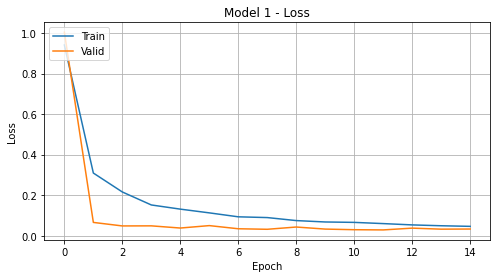

In [26]:
plot_curves(f'Model 1 - Loss', [m1_history.history['loss'], m1_history.history['val_loss']], 'Loss', 'Epoch', ['Train', 'Valid'])

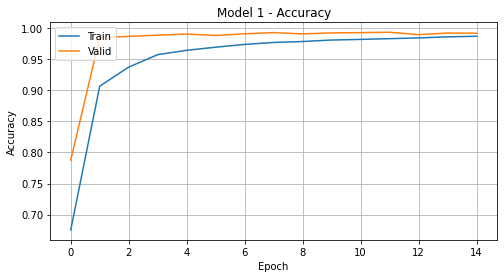

In [27]:
plot_curves(f'Model 1 - Accuracy', [m1_history.history['accuracy'], m1_history.history['val_accuracy']], 'Accuracy', 'Epoch', ['Train', 'Valid'])

In [0]:
def prepare_svhn_x(x):
  count = x.shape[3]
  arr = []
  for i in range(count):
    arr.append(x[:,:,:,i])
  
  arr = np.array(arr)

  return arr / 255

def prepare_svhn_y(y):
  y[y == 10] = 0
  return to_categorical(y)

In [0]:
svh_1_train = io.loadmat('train_32x32.mat')

In [30]:
svh_1_train_x = prepare_svhn_x(svh_1_train['X'])
svh_1_train_x.shape

(73257, 32, 32, 3)

In [31]:
svh_1_train_y = prepare_svhn_y(svh_1_train['y'])
svh_1_train_y.shape

(73257, 10)

In [32]:
svh_1_test = io.loadmat('test_32x32.mat')

svh_1_test_x = prepare_svhn_x(svh_1_test['X'])
print(svh_1_test_x.shape)

svh_1_test_y = prepare_svhn_y(svh_1_test['y'])
print(svh_1_test_y.shape)

(26032, 32, 32, 3)
(26032, 10)


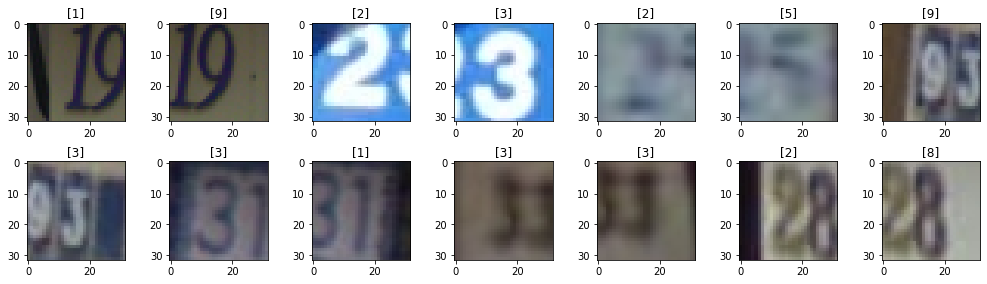

In [23]:
plt.figure(figsize=(14, 4))
for i in range(0, 14):
    plt.subplot(2, 7, i+1)
    image = svh_1_train_x[i]
    plt.title(str(svh_1_train['y'][i]))
    plt.imshow(image)
    
plt.tight_layout()
plt.show()

In [33]:
m1_svh_loss, m1_svh_acc = m1.evaluate(svh_1_test_x, svh_1_test_y, verbose=0)

print(f'Loss - {m1_svh_loss:.4f}\t Acc - {m1_svh_acc:.02%}')

Loss - 4.1882	 Acc - 14.79%


In [35]:
m1_svhn = get_model()
m1_svhn_history = m1_svhn.fit(svh_1_train_x, svh_1_train_y, batch_size=128, epochs=30, validation_split=0.2, verbose=1)

Epoch 1/30
458/458 [==============================] - 5s 11ms/step - loss: 2.2234 - accuracy: 0.1967 - val_loss: 2.0413 - val_accuracy: 0.2991
Epoch 2/30
458/458 [==============================] - 5s 10ms/step - loss: 1.8342 - accuracy: 0.3433 - val_loss: 1.4374 - val_accuracy: 0.5124
Epoch 3/30
458/458 [==============================] - 5s 10ms/step - loss: 1.3434 - accuracy: 0.5237 - val_loss: 1.1318 - val_accuracy: 0.6135
Epoch 4/30
458/458 [==============================] - 5s 10ms/step - loss: 1.0443 - accuracy: 0.6374 - val_loss: 0.7353 - val_accuracy: 0.7596
Epoch 5/30
458/458 [==============================] - 5s 10ms/step - loss: 0.8277 - accuracy: 0.7214 - val_loss: 0.5037 - val_accuracy: 0.8560
Epoch 6/30
458/458 [==============================] - 5s 10ms/step - loss: 0.6727 - accuracy: 0.7921 - val_loss: 0.4544 - val_accuracy: 0.8737
Epoch 7/30
458/458 [==============================] - 5s 10ms/step - loss: 0.5794 - accuracy: 0.8269 - val_loss: 0.3965 - val_accuracy: 0.8904

In [37]:
m1_svh_2_loss, m1_svh_2_acc = m1_svhn.evaluate(svh_1_test_x, svh_1_test_y, verbose=0)

print(f'Loss - {m1_svh_2_loss:.4f}\t Acc - {m1_svh_2_acc:.02%}')

Loss - 0.2911	 Acc - 92.61%


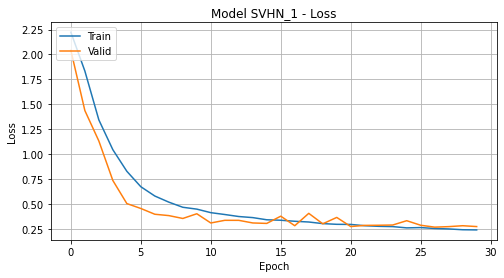

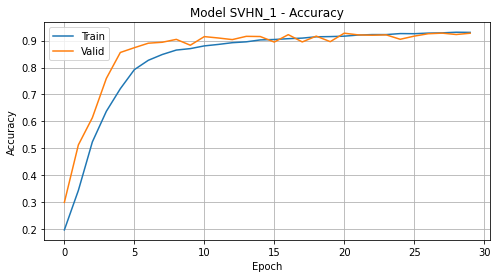

In [38]:
plot_curves(f'Model SVHN_1 - Loss', [m1_svhn_history.history['loss'], m1_svhn_history.history['val_loss']], 'Loss', 'Epoch', ['Train', 'Valid'])

plot_curves(f'Model SVHN_1 - Accuracy', [m1_svhn_history.history['accuracy'], m1_svhn_history.history['val_accuracy']], 'Accuracy', 'Epoch', ['Train', 'Valid'])

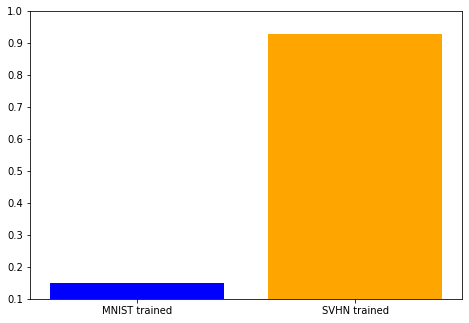

In [40]:
labels = ['MNIST trained', 'SVHN trained']
test_acc = [m1_svh_acc, m1_svh_2_acc]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,test_acc, color=['Blue', 'Orange', 'Green'])
plt.ylim(0.1,1)
plt.show()